In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

# plt.style.use('seaborn')
sns.set(font_scale = 2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [5]:
df_test = pd.read_csv("E:\\GithubProjects\\KagglePractice\\University\\gpascore.csv")

df_test = df_test.dropna(axis=0)

In [10]:
ModelLoc = "E:\\GithubProjects\\KagglePractice\\LOL_Wins\\Model"

model = tf.keras.models.load_model(ModelLoc)

dataframe = pd.read_csv("E:\\GithubProjects\\KagglePractice\\LOL_Wins\\high_diamond_ranked_10min.csv")

In [11]:
DataHeaderDict = {'blueWardsPlaced' : False,
				'blueWardsDestroyed' : False, 
				'blueFirstBlood' : True, 
				'blueKills' : True, 
  				'blueDeaths' : True, 
  				'blueAssists' : False, 
  				'blueEliteMonsters' : False, 
  				'blueDragons' : True, 
  				'blueHeralds' : False, 
  				'blueTowersDestroyed' : False, 
  				'blueTotalGold' : True, 
  				'blueAvgLevel' : False, 
  				'blueTotalExperience' : False, 
  				'blueTotalMinionsKilled' : True, 
  				'blueTotalJungleMinionsKilled' : False, 
  				'blueGoldDiff' : False, 
  				'blueExperienceDiff' : False, 
  				'blueCSPerMin' : False, 
  				'blueGoldPerMin' : False}
DataHeaders = []
for key in DataHeaderDict:
	if DataHeaderDict[key] == True:
		DataHeaders.append(key)

DataHeaderLen = len(DataHeaders)


DataY = dataframe['blueWins'].values 
DataX = []
for i, rows in dataframe.iterrows():
	Temp = []
	for i in range(DataHeaderLen):
		Temp.append(rows[DataHeaders[i]])
	DataX.append(Temp)
DataX = np.array(DataX)


# 테스트 셋, 트레인 셋 설정
from sklearn.model_selection import train_test_split
TrainX, TestX, TrainY, TestY = train_test_split(DataX, DataY, test_size=0.2, random_state=42)

history = model.fit(TrainX, TrainY, epochs=25, validation_split=0.25)

Epoch 1/25
186/186 [==============================] - 1s 4ms/step - loss: 0.6932 - accuracy: 0.5030 - val_loss: 0.6934 - val_accuracy: 0.4838
Epoch 2/25
186/186 [==============================] - 1s 4ms/step - loss: 0.6932 - accuracy: 0.5030 - val_loss: 0.6934 - val_accuracy: 0.4838
Epoch 3/25
186/186 [==============================] - 1s 4ms/step - loss: 0.6932 - accuracy: 0.5030 - val_loss: 0.6934 - val_accuracy: 0.4838
Epoch 4/25
186/186 [==============================] - 1s 4ms/step - loss: 0.6932 - accuracy: 0.5030 - val_loss: 0.6933 - val_accuracy: 0.4838
Epoch 5/25
186/186 [==============================] - 1s 4ms/step - loss: 0.6932 - accuracy: 0.5030 - val_loss: 0.6934 - val_accuracy: 0.4838
Epoch 6/25
186/186 [==============================] - 1s 4ms/step - loss: 0.6932 - accuracy: 0.5030 - val_loss: 0.6933 - val_accuracy: 0.4838
Epoch 7/25
186/186 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.5030 - val_loss: 0.6934 - val_accuracy: 0.4838
Epoch 

In [ ]:

model = tf.keras.models.load_model(ModelLoc)

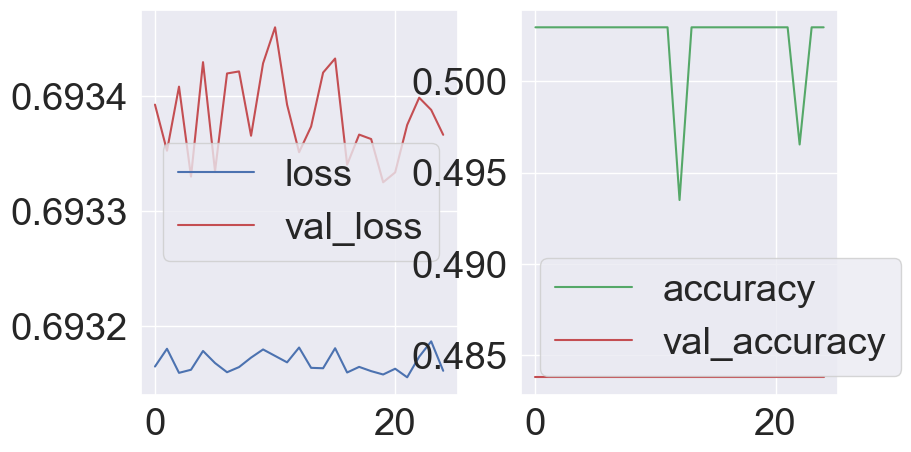

{'loss': [0.6931651830673218, 0.6931806206703186, 0.6931596994400024, 0.6931623816490173, 0.6931787133216858, 0.6931682229042053, 0.6931602358818054, 0.6931647062301636, 0.6931729316711426, 0.6931800246238708, 0.693174421787262, 0.6931688189506531, 0.6931816935539246, 0.693164050579071, 0.6931636929512024, 0.6931810975074768, 0.6931599974632263, 0.6931648850440979, 0.6931611895561218, 0.6931582689285278, 0.693163275718689, 0.693155825138092, 0.6931737065315247, 0.6931870579719543, 0.6931614875793457], 'accuracy': [0.5029525756835938, 0.5029525756835938, 0.5029525756835938, 0.5029525756835938, 0.5029525756835938, 0.5029525756835938, 0.5029525756835938, 0.5029525756835938, 0.5029525756835938, 0.5029525756835938, 0.5029525756835938, 0.5029525756835938, 0.4935043156147003, 0.5029525756835938, 0.5029525756835938, 0.5029525756835938, 0.5029525756835938, 0.5029525756835938, 0.5029525756835938, 0.5029525756835938, 0.5029525756835938, 0.5029525756835938, 0.49654126167297363, 0.5029525756835938,

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(9, 5))

ax[0].plot(history.history['loss'], 'b', label='loss')
ax[0].plot(history.history['val_loss'], 'r', label='val_loss')
# ax[0].xlabel('Epoch')
ax[0].legend()

ax[1].plot(history.history['accuracy'], 'g', label='accuracy')
ax[1].plot(history.history['val_accuracy'], 'r', label='val_accuracy')
# ax[1].xlabel('Epoch')
# ax[1].ylim(0.7, 1)
ax[1].legend()

plt.show()
print(history.history)
# model.evaluate(TestX, TestY, verbose=0)